In [61]:
from fastbook import *
from fastbook import *
from fastai.vision.widgets import *

In [62]:
path = Path('healthy_or_not')

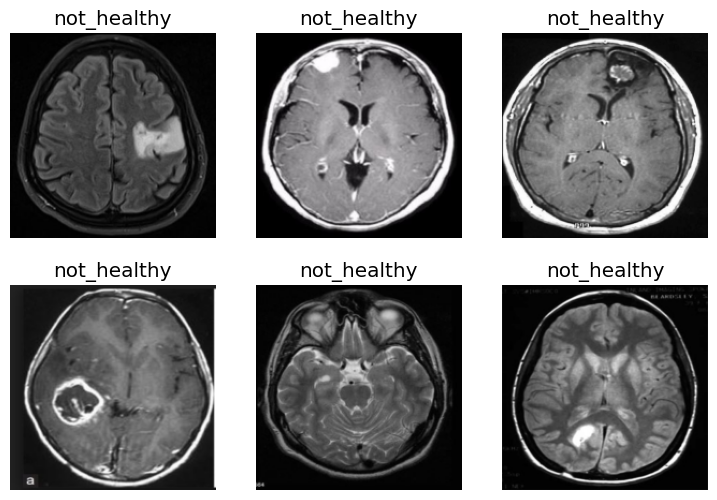

In [63]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [64]:
learn = vision_learner(dls, resnet152, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.972802,1.054196,0.380000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.456011,0.996533,0.320000,00:10
1,0.456845,0.932320,0.340000,00:11
2,0.333146,0.729480,0.260000,00:10
3,0.258545,0.369782,0.160000,00:09
4,0.208706,0.181104,0.080000,00:11
5,0.176520,0.197226,0.100000,00:10


In [60]:
is_healthy,_,probs = learn.predict(PILImage.create('test.jpg'))
print(f"This is: {is_healthy}.")
print(f"Probability its healthy: {probs[0]:.4f}")

This is: not_healthy.
Probability its healthy: 0.0003
